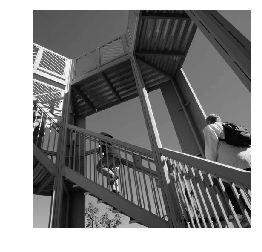

In [13]:
%matplotlib inline
from scipy import misc
ascent = misc.ascent()
import matplotlib.pyplot as plt
plt.gray()
plt.imshow(ascent)
plt.axis('off')
plt.show()


In [14]:
ascent?

(768, 1024, 3)
<built-in method max of numpy.ndarray object at 0x7f930c285a30>
uint8


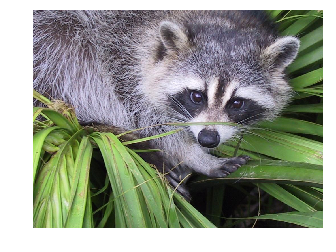

In [15]:
face = misc.face()
print(face.shape)
print(face.max)
print(face.dtype)
plt.axis("off")
plt.gray()
plt.imshow(face)
plt.show()

In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
selfie = mpimg.imread('selfie.png')

(855, 657, 4)
<built-in method max of numpy.ndarray object at 0x7f92af0f7120>
float32


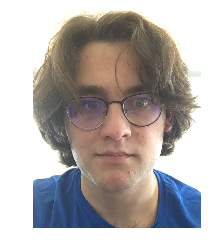

In [18]:
print(selfie.shape)
print(selfie.max)
print(selfie.dtype)
plt.axis("off")
plt.gray()
plt.imshow(selfie)
plt.show()

In [17]:
selfie?

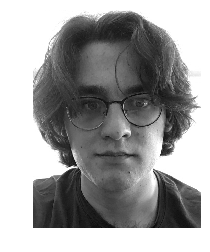

In [22]:
lum_img = selfie[:,:,1]
plt.axis("off")
imgplot = plt.imshow(lum_img)

In [63]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
def tint(imag, percent):
    """
    imag: the image which will be shaded
    percent: a value between 0 (image will remain unchanged
             and 1 (image will completely white)
    """
    tinted_imag = imag + (np.ones(imag.shape) - imag) * percent
    return tinted_imag

def shade(imag, percent):
    """
    imag: the image which will be shaded
    percent: a value between 0 (image will remain unchanged
             and 1 (image will be blackened)
    """
    shaded_imag = imag * (1-percent)
    return shaded_imag

def vertical_gradient_line(image, reverse=False):
    """
    We create a horizontal gradient line with the shape (1, image.shape[1], 3))
    The values are incremented from 0 to 1, if reverse is False,
    otherwise the values are decremented from 1 to 0.
    """
    number_of_columns = image.shape[1]
    if reverse:
        C = np.linspace(1, 0, number_of_columns)
    else:
        C = np.linspace(0, 1, number_of_columns)
    C = np.dstack((C, C, C))
    return C

def channel_adjust(channel, values):
    # flatten
    orig_size = channel.shape
    flat_channel = channel.flatten()
    adjusted = np.interp(
        flat_channel,
        np.linspace(0, 1, len(values)),
        values)

    # put back into image form
    return adjusted.reshape(orig_size)

def split_image_into_channels(image):
    red_channel = image[:, :, 0]
    green_channel = image[:, :, 1]
    blue_channel = image[:, :, 2]
    return red_channel, green_channel, blue_channel

def sepia(image):     

    img = image.astype(float) / 256.
    
    # R = .393*r + .769*g + .189&b
    # G = .349*r + .686*g + .168*b
    # B = .272*r + .534*g + .131*b

    sepia_filter = np.array([[.393, .769, .189],
                             [.349, .686, .168],
                             [.272, .534, .131]])

    scale = 0.01
    
    # Apply sepia filter
    sepia_img = img.dot(sepia_filter.T * scale)

    # Rescale filter lines
    sepia_img /= sepia_img.max()

    return sepia_img



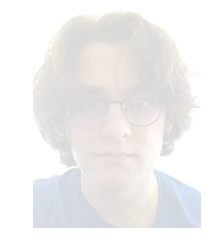

In [61]:
tinted_selfie = tint(selfie, 0.8)
plt.axis("off")
plt.imshow(tinted_selfie)
plt.imshow(tinted_selfie)

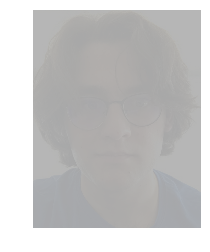

In [37]:
shaded_selfie = shade(selfie, 0.8)
plt.axis("off")
plt.imshow(shaded_selfie)
plt.imshow(shaded_selfie)

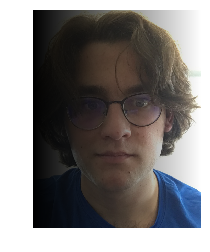

In [43]:
selfie = selfie[:,:,:3]
horizontal_brush = vertical_gradient_line(selfie)
tinted_selfie = selfie * horizontal_brush
horizontal_brush
plt.axis("off")
plt.imshow(tinted_selfie)

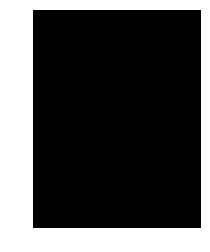

In [62]:
plt.axis("off")
plt.imshow(sepia(selfie))

In [58]:
red_channel, green_channel, blue_channel = split_image_into_channels(selfie)
